## Функции многих переменных

Существует функция n переменных x, y, z, ..., если по некоторому закону каждой системе n чисел (x, y, z, ...) из некоторого множества ставится в соответствие число u.

**Метод классификации KNN**. Когда мы получаем обучающую выборку, мы располагаем все её объекты на координатной плоскости (или в пространстве) и затем выбираем количество ближайших соседей. Когда k=1, алгоритм называется алгоритмом ближайших соседей. 

Далее мы получаем новую точку, для которой неизвестен класс и необходимо предсказать метку. Мы отмечаем эту точку на плоскости (или в пространстве) и находим ближайшую к ней точку из обучающей выборки. Мы присваиваем нашей точке метку найденной ближайшей точки.

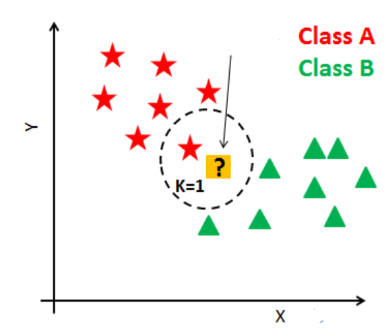

Если k>1 сначала находим k ближайших к точек, а затем классифицируете точки большинством «голосов» k соседей. Класс с наибольшим количеством «голосов» принимается за прогноз. Чтобы найти ближайшие похожие точки, вычисляются расстояния между точками с использованием мер расстояния, таких как евклидово расстояние, расстояние Хэмминга, расстояние Манхэттена и расстояние Минковского. 

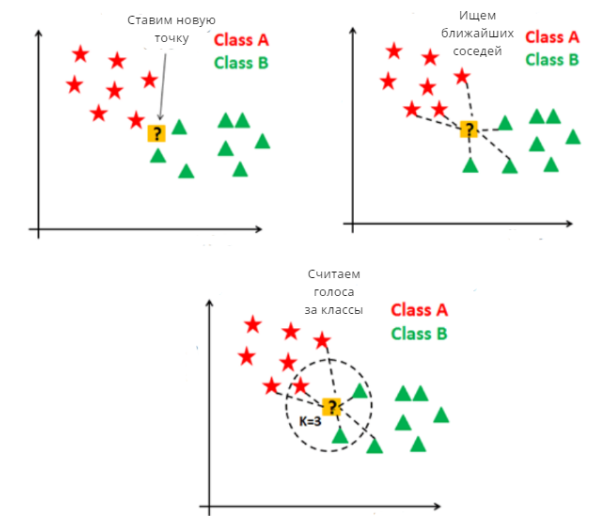

Для вычисления расстояния между двумя точками используются различные функции нескольких переменных. Рассмотрим самую популярную — **евклидово расстояние**:

$f(x,y) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

Производные для функций нескольких переменных называются **частными производными**.

В построении модели очень важно иметь возможность рассматривать вес каждого признака независимо и настраивать его отдельно — именно за это отвечают частные производные. Без них пришлось бы корректировать все параметры одновременно и одинаково, и мы бы никогда не получили нормальную модель.

Рассмотрим функцию двух переменных: $f(x, y) = x^2y^3$

$\frac{d f}{d x}$ - очень маленькое изменение значения функции f, произошедшее вследствие очень маленького изменения аргумента x. Но теперь у данных, к которым применяется функция, несколько измерений, а значит изменения могут происходить в нескольких направлениях.

Предположим, мы хотим посчитать производную для этой функции в точке (3; 2). 

Вспомним, что производная характеризует скорость изменения одной величины при изменении другой. Найдём производную по x ( скорость изменения функции: если x изменяется, а y остаётся на месте, то есть, например, если мы перемещаемся из точки (3; 2) в точку (3.01; 2):

$\frac{d f}{d x} = 2x*y^3$

### Геометрическая интерпретация

Есть касательная плоскость, на которой можно провести бесконечное количество касательных прямых:

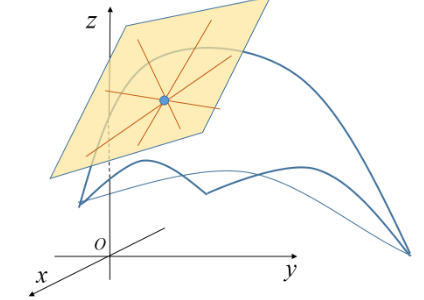

Из всех направлений можно выбрать **каноничные** — параллельные координатным осям, так как мы хотим рассмотреть изменение функции только в зависимости от изменения одной из переменных (например, только от x):

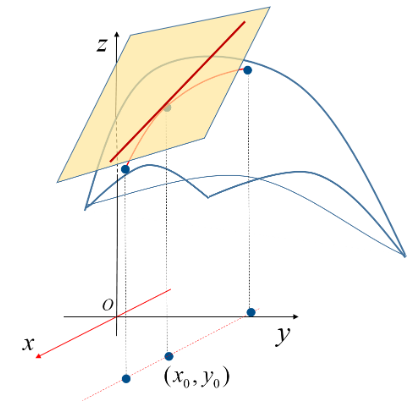

$\frac{d f}{d x} = \cfrac{f(x + \Delta, y_0) - f(x_0, y_0)}{\Delta x}$

Значения **смешанных производных** (когда ищем производную сначала по одной переменной, а затем — по другой) совпадают:

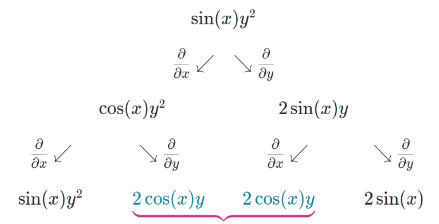

In [1]:
# поиск частной производной по a
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


### Экстремумы

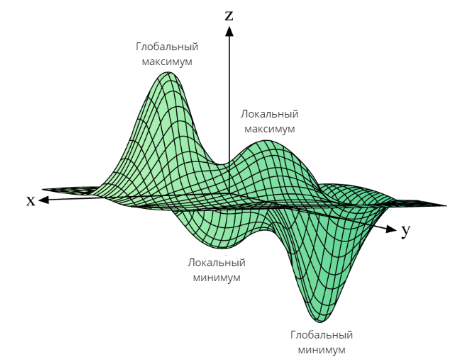

Алгоритм поиска минимумов и максимумов для функции нескольких переменных:

$f(x,y) = x^2 - 10x + y^2 - 12y + 71$

1. Найти частные производные этой функции:

    $f_x' = 2x - 10$

    $f_y' = 2y - 12$

2. Найти точки, в которых эти производные равны 0:

    $2x - 10 = 0$

    $2y - 12 = 0$

    Мы получили точку (5;6) — это стационарная точка.

    - В этой точке может быть максимум:

        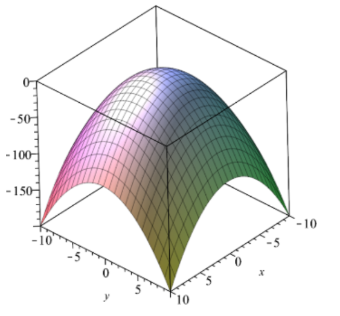

    - Минимум:

        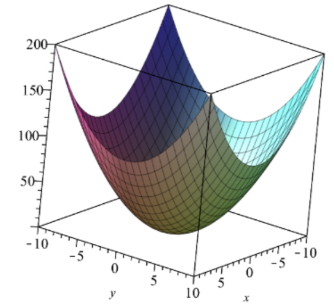

    - Или седловая точка, в которой производная меняет знак, но которая не является экстремумом:

        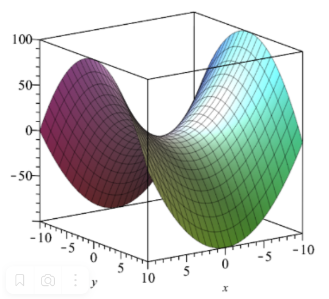

3. Определим, чем будет являться стационарная точка.

    **Матрица Гессе** — это матрица вторых частных производных. Для функции 2х переменных:

    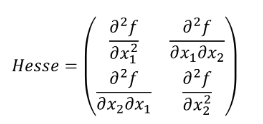

    Рассмотрим пример составления матрицы Гессе для нашей функции:

    $f_{xx}'' = 2$

    $f_{xy}'' = f_{yx}'' = 0$

    $f_{yy}'' = 2$
    
    $Hesse = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$

    Критерии для максимума и минимума следующие:
    - Если матрица Гессе положительно определена в этой точке (все её угловые миноры либо все собственные значения положительные), то в ней находится минимум;
    - Если матрица Гессе отрицательно определена в этой точке, то в ней находится строгий максимум;
    - В иных случаях точка является седловой.

    В нашем случае знак первого углового минора положителен (его значение равно 2), как и знак второго углового минора (его значение равно 4). Оба собственных значения также положительны (оба равны 2). Это значит, что в данной точке находится минимум.

In [4]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [6]:
from sympy import *
x,y,z,w=symbols(' x y z w' )
g = 2*z*x + 2*z*y + 2*x*y
print('Целевая функция для аргументов x, y и z: f = ', g)
q = x*y*z - 1
print('Функция ограничений: ', q,'= 0')
f = 2*z*x + 2*z*y + 2*x*y + w*(x*y*z - 1)
print('Функция Лагранжа: ',f)
f_x = f.diff(x)
print('df/dx =',f_x,'= 0')
f_y = f.diff(y)
print('df/dy =',f_y,'= 0')
f_z = f.diff(z)
print('df/dz =',f_z,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([f_x,f_y,f_z,fw],x,y,z,w)
print('Стационарные точки M(x,y,z):\n',sols)

Целевая функция для аргументов x, y и z: f =  2*x*y + 2*x*z + 2*y*z
Функция ограничений:  x*y*z - 1 = 0
Функция Лагранжа:  w*(x*y*z - 1) + 2*x*y + 2*x*z + 2*y*z
df/dx = w*y*z + 2*y + 2*z = 0
df/dy = w*x*z + 2*x + 2*z = 0
df/dz = w*x*y + 2*x + 2*y = 0
df/dw = x*y*z - 1 = 0
Стационарные точки M(x,y,z):
 [(1, 1, 1, -4), (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I), (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]
